# 数据集描述

数据集包含从拉勾网获取的多个python相关的职位信息

* positionName  职位名       
* workYear  工作经验             
* education  学历            
* jobNature  职位性质（全职/实习）           
* financeStage  融资情况         
* industryField  所属行业        
* companyShortName  公司名称     
* companyFullName  公司全称      
* city  岗位所属城市                 
* salary  薪资待遇       
* district  岗位所属地区             
* createTime  职位信息创建时间           
* positionLables  职位标签       
* companySize  公司规模    
* firstType  一级岗位性质            
* secondType  次级岗位性质  
* isSchoolJob  是否是校招职位（1/0）          

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 图形支持中文显示
mpl.rcParams["font.family"] = "SimHei"
# 使用非Unicode的负号。（当使用中文字体时，需要设置）
mpl.rcParams["axes.unicode_minus"]=False

# 一、数据加载与清洗

In [2]:
df = pd.read_csv("lago.csv")
#查看缺失值信息
display(df.info())
#查看缺失值信息以后发现有些字段只有一条记录缺失，所以考虑删除
#对于没有地区信息的记录也不多，所以也删除，因为地区信息无法填充
df = df.dropna()
# display(df.info())
# 检测重复值
df.duplicated()
# 查看重复记录
# df[df.duplicated()]
#删除重复值
df.drop_duplicates(subset=['positionName','workYear','education','jobNature','financeStage','industryField','companyShortName','city','salary','district','createTime','positionLables','companySize','firstType','secondType','isSchoolJob'], inplace=True)
#随机抽取3个数据样本看数据是否导入正确
# display(df.sample(5))
#查看数据基本信息，看数据的行列数、数据类型是否正确、是否有重复数据，以及首先对重复数据进行处理
# display(df.loc[56])
#查看整体数据信息
# df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20937 entries, 0 to 20936
Data columns (total 16 columns):
positionName        20937 non-null object
workYear            20937 non-null object
education           20937 non-null object
jobNature           20937 non-null object
financeStage        20936 non-null object
industryField       20936 non-null object
companyShortName    20937 non-null object
city                20937 non-null object
salary              20937 non-null object
district            20734 non-null object
createTime          20937 non-null object
positionLables      20937 non-null object
companySize         20936 non-null object
firstType           20937 non-null object
secondType          20937 non-null object
isSchoolJob         20937 non-null int64
dtypes: int64(1), object(15)
memory usage: 2.6+ MB


None

,positionName,workYear,education,jobNature,financeStage,industryField,companyShortName,city,salary,district,createTime,positionLables,companySize,firstType,secondType,isSchoolJob
0,Python爬虫开发工程师,1-3年,大专,全职,不需要融资,"数据服务,企业服务",艾瑞集团,北京,15k-30k,朝阳区,2018-07-12 19:11:21,[],150-500人,开发|测试|运维类,数据开发,0
1,python(爬虫方向)工程师(J11045),1-3年,大专,全职,C轮,教育,传智播客,北京,10k-20k,昌平区,2018-07-03 09:39:15,[],500-2000人,开发/测试/运维类,后端开发,0
2,Python开发工程师,1-3年,大专,全职,不需要融资,游戏,智水互娱,北京,20k-40k,东城区,2018-07-19 08:12:44,"['Java', '对日']",15-50人,开发/测试/运维类,后端开发,0
3,Python工程师,1-3年,大专,全职,B轮,数据服务,好巧,北京,15k-25k,朝阳区,2018-07-19 08:59:31,['Java'],150-500人,开发/测试/运维类,后端开发,0
4,Python,1-3年,大专,全职,不需要融资,移动互联网,武汉佰钧成技术有限公司,北京,10k-15k,朝阳区,2018-07-18 07:41:24,"['GO', 'Cisco', '交换机']",2000人以上,开发/测试/运维类,后端开发,0
5,python开发工程师,1-3年,大专,全职,未融资,移动互联网,壕鑫互联,北京,15k-25k,海淀区,2018-07-16 09:25:01,"['高级', '中级', '架构师', '爬虫', '服务器端']",50-150人,开发/测试/运维类,后端开发,0
6,爬虫工程师,1-3年,大专,全职,不需要融资,教育、移动互联网,世纪超星,北京,5k-6k,海淀区,2018-07-19 09:34:54,"['数据挖掘', 'Java', 'python']",2000人以上,开发/测试/运维类,数据开发,0
7,Python高级开发,1-3年,大专,全职,A轮,"移动互联网,教育",音悦荚,北京,15k-30k,昌平区,2018-07-12 11:44:51,"['资深', '后端开发', '数据分析', '服务器端']",15-50人,开发/测试/运维类,后端开发,0
8,python开发工程师,1-3年,大专,全职,不需要融资,移动互联网,币信,北京,15k-30k,海淀区,2018-07-19 10:38:52,"['高级', 'php']",50-150人,开发/测试/运维类,软件开发,0
9,python开发工程师,1-3年,大专,全职,天使轮,"移动互联网,文化娱乐",时阅文学,北京,10k-20k,通州区,2018-07-06 09:00:10,"['php', 'Java']",50-150人,开发/测试/运维类,后端开发,0


### 数据处理
* workYear 只有离散的几个取值，不需要处理成数值类型
* salary 需要处理成数值类型
* createTime 需要处理成datatime类型
* positionLables 需要进行拆分
* companySize需要根据公司人数进行规模区间的划分

#### salary字段是数值区间，考虑将其转换成数值类型然后拆分成最低工资和最高工资两项

In [3]:
df_salary = df['salary'].str.split('-', expand=True)
df_salary.dropna(inplace=True)
# df_salary.info()
df['minSalary'] = df_salary[0].str.extract('([0-9.]+)', expand=False).astype('int')
# df_salary[1].isnull().any()
# df_salary[1].fillna(1, inplace=True)
# if df_salary[1].any == np.nan:
#     display(1)
df['maxSalary'] = df_salary[1].str.extract('([0-9.]+)', expand=False).astype('int')
# display(type(df_salary['minSalary'][0]))
# df_salary['maxSalary'].astype('int')
display(df.sample(100))

,positionName,workYear,education,jobNature,financeStage,industryField,companyShortName,city,salary,district,createTime,positionLables,companySize,firstType,secondType,isSchoolJob,minSalary,maxSalary
1466,Python开发工程师（驻场）,1-3年,本科,全职,B轮,"移动互联网,企业服务",优维科技,广州,13k-15k,天河区,2018-07-18 20:02:09,"['云计算', '大数据', 'Java', '运维']",50-150人,开发/测试/运维类,后端开发,0,13.0,15.0
14890,高级算法工程师-成都-00299,5-10年,本科,全职,不需要融资,游戏,成都数字天空科技有限公司,成都,15k-25k,高新区,2018-07-13 12:17:15,"['图像处理', '机器学习', '深度学习', '图形处理', '计算机视觉']",500-2000人,开发/测试/运维类,数据开发,0,15.0,25.0
1272,Python工程师,3-5年,本科,全职,B轮,"移动互联网,电子商务",卖座网,深圳,10k-20k,南山区,2018-07-19 09:34:24,"['高级', '中级', 'linux', '数据挖掘', '算法']",500-2000人,开发/测试/运维类,后端开发,0,10.0,20.0
202,Python工程师（基金方向）,1-3年,本科,全职,A轮,金融,凤凰金融,北京,10k-20k,朝阳区,2018-07-13 11:45:42,"['金融', '大数据', 'Java']",500-2000人,开发/测试/运维类,后端开发,0,10.0,20.0
9792,数据分析师,3-5年,本科,全职,不需要融资,"金融,移动互联网",耀盛中国,北京,15k-25k,朝阳区,2018-06-26 13:50:28,"['算法', '数据挖掘', '大数据']",150-500人,开发/测试/运维类,数据开发,0,15.0,25.0
16937,数据挖掘工程师（信贷）,3-5年,硕士,全职,C轮,"移动互联网,金融",随手科技,深圳,13k-25k,南山区,2018-07-05 09:56:38,"['金融', '数据分析', 'SPSS']",500-2000人,开发/测试/运维类,数据开发,0,13.0,25.0
13458,高级算法专家,5-10年,硕士,全职,不需要融资,"移动互联网,电子商务",上海旌显,上海,25k-45k,长宁区,2018-07-12 11:13:54,"['数据挖掘', '大数据', '机器学习']",50-150人,开发/测试/运维类,数据开发,0,25.0,45.0
7984,数据分析师,不限,本科,全职,上市公司,金融,平安银行信用卡中心,深圳,15k-30k,南山区,2018-06-29 17:34:20,"['银行', '资深', '高级', '专员', 'sas']",500-2000人,产品/需求/项目类,数据分析,0,15.0,30.0
18723,深度学习算法实习生,不限,硕士,实习,未融资,"移动互联网,信息安全",模识科技,北京,8k-10k,海淀区,2018-07-16 16:47:45,['人工智能'],50-150人,开发/测试/运维类,数据开发,1,8.0,10.0
5651,大数据分析师,1-3年,不限,全职,C轮,"移动互联网,金融",人人行(借贷宝),北京,14k-28k,朝阳区,2018-07-19 08:35:41,"['专员', '数据挖掘']",2000人以上,产品/需求/项目类,数据分析,0,14.0,28.0


#### “companySize”（公司人数）
- 由于“companySize”字段取值在['2000人以上', '500-2000人','50-150人', '15-50人', '150-500人', '少于15人', '5000人以上']，取公司人数中的最大人数（转换为整型，增加一列maxCompanySize）作为公司规模的判断标准
- maxCompanySize<150 都记为'小型企业'
- 150<maxCompanySize<2000 '记为'中型企业'
- maxCompanySize>2000 记为大型企业

In [4]:
# df.dropna(inplace=True)
# df.info()
# display(df)
df['maxCompanySize'] = df['companySize'].str.extract(r'([0-9.]+)[人以上]', expand=True).astype('int')
# df['maxCompanySize']
df.loc[df['maxCompanySize']<=150, 'companyScale'] = '小型企业'
df.loc[(150<df['maxCompanySize'])&(df['maxCompanySize']<2000), 'companyScale'] = '中型企业'
df.loc[df['maxCompanySize']>=2000, 'companyScale'] = '大型企业'
display(df)

,positionName,workYear,education,jobNature,financeStage,industryField,companyShortName,city,salary,district,createTime,positionLables,companySize,firstType,secondType,isSchoolJob,minSalary,maxSalary,maxCompanySize,companyScale
0,Python爬虫开发工程师,1-3年,大专,全职,不需要融资,"数据服务,企业服务",艾瑞集团,北京,15k-30k,朝阳区,2018-07-12 19:11:21,[],150-500人,开发|测试|运维类,数据开发,0,15.0,30.0,500,中型企业
1,python(爬虫方向)工程师(J11045),1-3年,大专,全职,C轮,教育,传智播客,北京,10k-20k,昌平区,2018-07-03 09:39:15,[],500-2000人,开发/测试/运维类,后端开发,0,10.0,20.0,2000,大型企业
2,Python开发工程师,1-3年,大专,全职,不需要融资,游戏,智水互娱,北京,20k-40k,东城区,2018-07-19 08:12:44,"['Java', '对日']",15-50人,开发/测试/运维类,后端开发,0,20.0,40.0,50,小型企业
3,Python工程师,1-3年,大专,全职,B轮,数据服务,好巧,北京,15k-25k,朝阳区,2018-07-19 08:59:31,['Java'],150-500人,开发/测试/运维类,后端开发,0,15.0,25.0,500,中型企业
4,Python,1-3年,大专,全职,不需要融资,移动互联网,武汉佰钧成技术有限公司,北京,10k-15k,朝阳区,2018-07-18 07:41:24,"['GO', 'Cisco', '交换机']",2000人以上,开发/测试/运维类,后端开发,0,10.0,15.0,2000,大型企业
5,python开发工程师,1-3年,大专,全职,未融资,移动互联网,壕鑫互联,北京,15k-25k,海淀区,2018-07-16 09:25:01,"['高级', '中级', '架构师', '爬虫', '服务器端']",50-150人,开发/测试/运维类,后端开发,0,15.0,25.0,150,小型企业
6,爬虫工程师,1-3年,大专,全职,不需要融资,教育、移动互联网,世纪超星,北京,5k-6k,海淀区,2018-07-19 09:34:54,"['数据挖掘', 'Java', 'python']",2000人以上,开发/测试/运维类,数据开发,0,5.0,6.0,2000,大型企业
7,Python高级开发,1-3年,大专,全职,A轮,"移动互联网,教育",音悦荚,北京,15k-30k,昌平区,2018-07-12 11:44:51,"['资深', '后端开发', '数据分析', '服务器端']",15-50人,开发/测试/运维类,后端开发,0,15.0,30.0,50,小型企业
8,python开发工程师,1-3年,大专,全职,不需要融资,移动互联网,币信,北京,15k-30k,海淀区,2018-07-19 10:38:52,"['高级', 'php']",50-150人,开发/测试/运维类,软件开发,0,15.0,30.0,150,小型企业
9,python开发工程师,1-3年,大专,全职,天使轮,"移动互联网,文化娱乐",时阅文学,北京,10k-20k,通州区,2018-07-06 09:00:10,"['php', 'Java']",50-150人,开发/测试/运维类,后端开发,0,10.0,20.0,150,小型企业


#### createTime处理为日期类型

In [5]:
df['createTime'] = df['createTime'].str.extract(r'(.*) ')
df['createTime'] = pd.to_datetime(df['createTime'])
display(df)

,positionName,workYear,education,jobNature,financeStage,industryField,companyShortName,city,salary,district,createTime,positionLables,companySize,firstType,secondType,isSchoolJob,minSalary,maxSalary,maxCompanySize,companyScale
0,Python爬虫开发工程师,1-3年,大专,全职,不需要融资,"数据服务,企业服务",艾瑞集团,北京,15k-30k,朝阳区,2018-07-12,[],150-500人,开发|测试|运维类,数据开发,0,15.0,30.0,500,中型企业
1,python(爬虫方向)工程师(J11045),1-3年,大专,全职,C轮,教育,传智播客,北京,10k-20k,昌平区,2018-07-03,[],500-2000人,开发/测试/运维类,后端开发,0,10.0,20.0,2000,大型企业
2,Python开发工程师,1-3年,大专,全职,不需要融资,游戏,智水互娱,北京,20k-40k,东城区,2018-07-19,"['Java', '对日']",15-50人,开发/测试/运维类,后端开发,0,20.0,40.0,50,小型企业
3,Python工程师,1-3年,大专,全职,B轮,数据服务,好巧,北京,15k-25k,朝阳区,2018-07-19,['Java'],150-500人,开发/测试/运维类,后端开发,0,15.0,25.0,500,中型企业
4,Python,1-3年,大专,全职,不需要融资,移动互联网,武汉佰钧成技术有限公司,北京,10k-15k,朝阳区,2018-07-18,"['GO', 'Cisco', '交换机']",2000人以上,开发/测试/运维类,后端开发,0,10.0,15.0,2000,大型企业
5,python开发工程师,1-3年,大专,全职,未融资,移动互联网,壕鑫互联,北京,15k-25k,海淀区,2018-07-16,"['高级', '中级', '架构师', '爬虫', '服务器端']",50-150人,开发/测试/运维类,后端开发,0,15.0,25.0,150,小型企业
6,爬虫工程师,1-3年,大专,全职,不需要融资,教育、移动互联网,世纪超星,北京,5k-6k,海淀区,2018-07-19,"['数据挖掘', 'Java', 'python']",2000人以上,开发/测试/运维类,数据开发,0,5.0,6.0,2000,大型企业
7,Python高级开发,1-3年,大专,全职,A轮,"移动互联网,教育",音悦荚,北京,15k-30k,昌平区,2018-07-12,"['资深', '后端开发', '数据分析', '服务器端']",15-50人,开发/测试/运维类,后端开发,0,15.0,30.0,50,小型企业
8,python开发工程师,1-3年,大专,全职,不需要融资,移动互联网,币信,北京,15k-30k,海淀区,2018-07-19,"['高级', 'php']",50-150人,开发/测试/运维类,软件开发,0,15.0,30.0,150,小型企业
9,python开发工程师,1-3年,大专,全职,天使轮,"移动互联网,文化娱乐",时阅文学,北京,10k-20k,通州区,2018-07-06,"['php', 'Java']",50-150人,开发/测试/运维类,后端开发,0,10.0,20.0,150,小型企业


#### 处理好的数据保存为新的文件

In [6]:
df.info()
df.to_csv('lagou.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8854 entries, 0 to 20936
Data columns (total 20 columns):
positionName        8854 non-null object
workYear            8854 non-null object
education           8854 non-null object
jobNature           8854 non-null object
financeStage        8854 non-null object
industryField       8854 non-null object
companyShortName    8854 non-null object
city                8854 non-null object
salary              8854 non-null object
district            8854 non-null object
createTime          8854 non-null datetime64[ns]
positionLables      8854 non-null object
companySize         8854 non-null object
firstType           8854 non-null object
secondType          8854 non-null object
isSchoolJob         8854 non-null int64
minSalary           8847 non-null float64
maxSalary           8847 non-null float64
maxCompanySize      8854 non-null int32
companyScale        8854 non-null object
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), objec

# 二、数据分析

#### 导入处理过后的数据

In [7]:
lagou = pd.read_csv('lagou.csv')
lagou.sample(5)

,positionName,workYear,education,jobNature,financeStage,industryField,companyShortName,city,salary,district,createTime,positionLables,companySize,firstType,secondType,isSchoolJob,minSalary,maxSalary,maxCompanySize,companyScale
964,高级python开发工程师,3-5年,本科,全职,上市公司,"企业服务,数据服务",圆通,上海,20k-40k,青浦区,2018-07-17,"['云计算', 'php', 'Java', 'MySQL']",2000人以上,开发/测试/运维类,后端开发,0,20.0,40.0,2000,大型企业
4557,高级数据分析师,3-5年,本科,全职,B轮,移动互联网,最右,北京,25k-50k,海淀区,2018-07-10,"['大数据', '数据挖掘', '用户研究']",150-500人,开发/测试/运维类,数据开发,0,25.0,50.0,500,中型企业
6341,图像处理算法工程师,3-5年,硕士,全职,不需要融资,"数据服务,其他",宜高美,成都,15k-30k,高新区,2018-07-03,['模式识别'],150-500人,开发/测试/运维类,数据开发,0,15.0,30.0,500,中型企业
7450,深度学习平台研发工程师,1-3年,硕士,全职,D轮及以上,移动互联网,小米,北京,25k-45k,海淀区,2018-07-18,"['云计算', '高级', '中级']",2000人以上,开发/测试/运维类,数据开发,0,25.0,45.0,2000,大型企业
2802,数据分析师,1-3年,本科,全职,不需要融资,"移动互联网,社交网络",东方头条,上海,10k-20k,浦东新区,2018-07-19,"['资深', '高级', '中级', '初级', '用户研究']",500-2000人,开发/测试/运维类,数据开发,0,10.0,20.0,2000,大型企业


### python相关的所有岗位在不同城市的分布
- 北京占据了40%以上的岗位，其次是上海，深圳，杭州和广州。说明一线城市对岗位的需求还是很大

([<matplotlib.patches.Wedge at 0x29763b7f080>,
 [Text(0.335969,1.35909,'北京'),
  Text(-1.09805,-0.0655323,'上海'),
  Text(-0.544357,-0.955864,'深圳'),
  Text(0.253354,-1.07043,'杭州'),
  Text(1.04378,-1.07727,'广州'),
  Text(1.35782,-0.637436,'成都'),
  Text(1.45718,-0.355832,'武汉'),
  Text(1.49088,-0.165189,'南京'),
  Text(1.49944,-0.0409768,'西安')],
 [Text(0.21598,0.8737,'42.29%'),
  Text(-0.598934,-0.0357449,'17.33%'),
  Text(-0.296922,-0.52138,'14.30%'),
  Text(0.138193,-0.583869,'9.58%'),
  Text(0.695854,-0.718183,'7.52%'),
  Text(0.905213,-0.424957,'4.01%'),
  Text(0.971456,-0.237222,'2.34%'),
  Text(0.993918,-0.110126,'1.77%'),
  Text(0.999627,-0.0273178,'0.87%')])

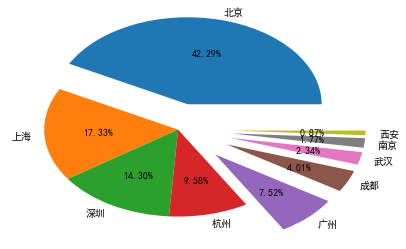

In [8]:
### d = {}
# li = lagou['city']
# li
# for i in li:
#     d[i] = d.get(i, 0) + 1
# plt.pie(d.values(), labels=d.keys(),autopct="%.2f%%")
city = lagou['city'].value_counts()
plt.pie(city, labels=city.keys(),explode=[0.3,0,0,0,0.4,0.4,0.4,0.4,0.4], autopct="%.2f%%")

In [9]:
import pyecharts
bar = pyecharts.Bar('城市与职位数量')
bar.add('', city.index, city.values, mark_point=["max"])
bar

In [10]:
# 城市所占百分比
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct

北京    42.29%
上海    17.33%
深圳    14.30%
杭州     9.58%
广州     7.52%
成都     4.01%
武汉     2.34%
南京     1.77%
西安     0.87%
Name: city, dtype: object

#### 不同城市最低平均薪资和最高平均薪资
* 无论是最低平均薪资还是最高平均薪资，一线城市的薪资待遇还是最高的

In [11]:
city_min_salary = lagou.groupby('city', sort=True)['minSalary'].mean().sort_values(ascending=False)
display(city_min_salary)
bar_min_salary = pyecharts.Bar('城市最低平均薪资')
bar_min_salary.add('', city_min_salary.index, city_min_salary.values, mark_point=["max"])
bar_min_salary

city
北京    18.200321
上海    16.105952
深圳    15.748617
杭州    15.187500
广州    13.521805
南京    12.267516
成都    11.901408
武汉    10.628019
西安     9.090909
Name: minSalary, dtype: float64

In [12]:
city_max_salary = lagou.groupby('city', sort=True)['maxSalary'].mean().sort_values(ascending=False)
display(city_max_salary)
bar_max_salary = pyecharts.Bar('城市最高平均薪资')
bar_max_salary.add('', city_max_salary.index, city_max_salary.values, mark_point=["max"])
bar_max_salary

city
北京    32.822917
上海    28.601700
深圳    28.287747
杭州    27.732311
广州    24.348872
南京    22.343949
成都    21.323944
武汉    19.323671
西安    16.402597
Name: maxSalary, dtype: float64

#### 公司规模的分布
* 2000人以上的大型企业占据了一半的数量

([<matplotlib.patches.Wedge at 0x29763ea3208>,
 [Text(-0.0214653,1.09979,'大型企业'),
  Text(-0.627216,-0.903659,'小型企业'),
  Text(0.891247,-0.644731,'中型企业')],
 [Text(-0.0117084,0.599886,'50.62%'),
  Text(-0.342118,-0.492905,'29.44%'),
  Text(0.486135,-0.351671,'19.93%')])

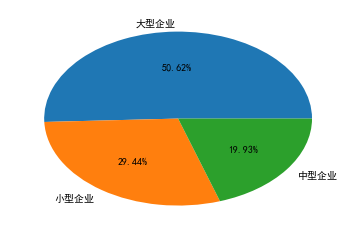

In [13]:
# display(lagou.columns)
scale = lagou['companyScale'].value_counts()
# display(scale.plot(kind='pie'))
plt.pie(scale, labels=scale.keys(),autopct="%.2f%%")

#### 不同规模的公司的平均最低薪资待遇
- 大型企业的工资待遇比小型企业和中型企业略高，但是差距不大

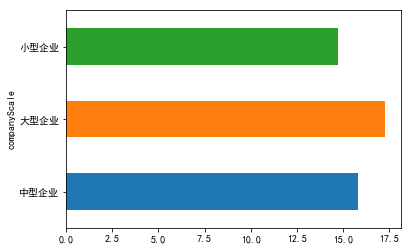

In [14]:
scale_salary = lagou.groupby('companyScale')['minSalary'].mean()
scale_salary.plot(kind='barh')

#### 不同规模的公司在不同的城市的分布
- 通过标准差可以看出来不同城市的不同规模的公司分布差不多
- 北京的公司数量明显多于其他城市

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

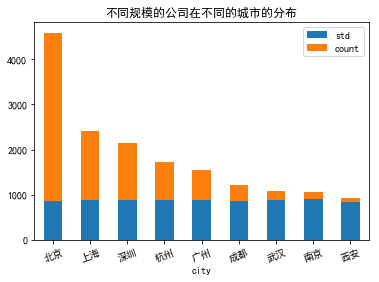

In [15]:
scale_salary = lagou.groupby('city')['maxCompanySize'].agg(['std', 'count']).sort_values(by='count', ascending=False)
scale_salary.plot(kind='bar', title='不同规模的公司在不同的城市的分布', stacked=True)
plt.xticks(rotation=20)

#### 学历要求
- 对本科学历的要求达到了绝大多数，原因一方面是本科生数量是最多的，另一方面说明本科生已经可以胜任绝大多数工作了

([<matplotlib.patches.Wedge at 0x2976528f160>,
 [Text(-0.740692,0.81325,'本科'),
  Text(0.42968,-1.01261,'硕士'),
  Text(0.970378,-0.518042,'大专'),
  Text(1.08335,-0.190671,'不限'),
  Text(1.09975,-0.0234165,'博士')],
 [Text(-0.404014,0.443591,'73.51%'),
  Text(0.234371,-0.552332,'15.74%'),
  Text(0.529297,-0.282568,'5.87%'),
  Text(0.590917,-0.104003,'4.19%'),
  Text(0.599864,-0.0127727,'0.68%')])

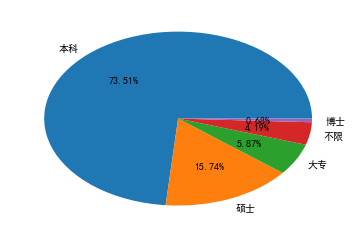

In [16]:
job_academic = lagou['education'].value_counts()
plt.pie(job_academic, labels=job_academic.keys(),autopct="%.2f%%")

#### 不同学历的平均最低薪资待遇
- 学历越高待遇越高，知识改变命运呀

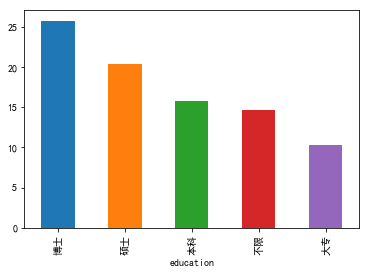

In [17]:
salary_academic = lagou.groupby('education')['minSalary'].mean().sort_values(ascending=False)
display(salary_academic.plot(kind='bar'))

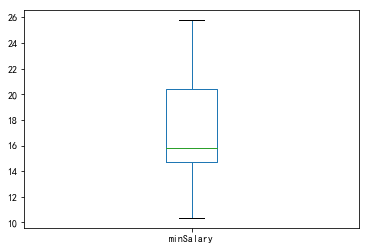

In [18]:
#利用箱线图分析薪资分布情况
display(salary_academic.plot(kind='box'))

#### 工作经验对平均最低薪资影响
* 工作经验与平均最低薪资成正相关

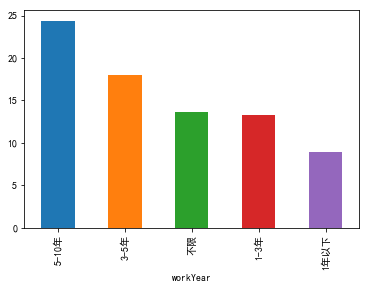

In [19]:
# display(lagou.columns)
salary_academic = lagou.groupby('workYear')['minSalary'].mean().sort_values(ascending=False)
display(salary_academic.plot(kind='bar'))

#### 工作经验的分布
- 3-5年的工作经验需求最多，对于AI来说3-5年算是比较长工作经验了，而且5年前从事AI的人是很少的，因此需求量这么大一方面体现了AI行业对工作经验要求较高，另一方面体现了当前社会对AI人才的渴望程度是很强烈的
- 1-3年的工作经验排在3-5年之后，之前很多高校AI的相关专业比较少，所以1-3年工作经验的人也还是较少，1-3年工作经验的人作为刚入行的人还是要不停积累经验，未来几年必将成为他们职业发展的黄金期
- 5-10年更多的属于一些科学家级别的人物，一个公司对于精尖人才的需求肯定也没有那么多

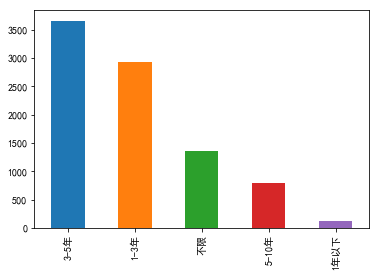

In [20]:
workyear_distr = lagou['workYear'].value_counts()
display(workyear_distr.plot(kind='bar'))

#### 行业分布
- 由于互联网行业与编程息息相关，所以理所应当对程序员的需求最多，编程对于其他行业只是作为锦上添花的作用，在业务中所占比重也不大

In [21]:
industry = lagou['industryField'].str.split(',', expand = True)
industry_top10 = industry.apply(pd.value_counts).sum(axis = 1).nlargest(10)
display(industry_top10)
bar_industry = pyecharts.Bar('行业分布')
bar_industry.add('', industry_top10.index, industry_top10.values, mark_point=["max"])
bar_industry

移动互联网    5276.0
数据服务     1679.0
金融       1461.0
电子商务     1037.0
企业服务      796.0
O2O       597.0
硬件        488.0
教育        417.0
游戏        410.0
文化娱乐      326.0
dtype: float64

#### 公司招聘职位数目
- 美团，腾讯，头条，百度，京东等大型互联网公司对人工智能人才的需求很大，原因在于他们的数据量大，资金足，足以发展人工智能

In [22]:
company_counts = lagou['companyShortName'].value_counts()[:20]
display(company_counts)
display(type(company_counts))
bar_company = pyecharts.Bar('公司职位')
bar_company.add('', company_counts.index, company_counts.values, mark_point=["max"])
bar_company

美团点评           146
腾讯             138
字节跳动           121
百度             112
京东集团            77
滴滴出行            63
小米              60
好未来             59
网易              53
数美              51
顺丰科技有限公司        48
平安科技            47
爱奇艺             44
蚂蚁金服集团          44
搜狗              42
武汉佰钧成技术有限公司     39
趣头条             38
链家              38
京东金融            37
新浪微博            36
Name: companyShortName, dtype: int64

pandas.core.series.Series

#### 不同的职位的相关分析
- 数据分析的职位需求最大，体现了大数据量下的人才需求的增长，而且数据分析与AI挂钩但相对来说要求没有机器学习那么高，能够适合很多本科生做
- 算法工程师要求高，而且需求量大，可以将以后的工作目标向算法工程师靠拢
- 人工智能工程师要求高，市场上人才相对较少，所以招聘人数并没有太多
- python工程师，爬虫，Django这些相对简单的工作由于市场已经基本饱和，而且由于python效率不高，所以需求较少

In [23]:
# display(lagou)
p_name = lagou['positionName'].values
display(p_name)
spider = 0
django = 0
data_analysis = 0
data_mining = 0
algorithm = 0
machine_learning = 0
deep_learning = 0
ai_engineer = 0
python_engineer = 0
for i in range(len(p_name)):
    if ('爬虫' in p_name[i]):
        spider += 1
    elif ('django') in p_name[i]:
        django += 1
    elif ('Django') in p_name[i]:
        django += 1
    elif '数据分析' in p_name[i]:
        data_analysis += 1
    elif '数据挖掘' in p_name[i]:
        data_mining += 1
    elif ('算法') in p_name[i]:
        algorithm += 1
    elif ('机器学习') in p_name[i]:
        machine_learning += 1
    elif ('深度学习') in p_name[i]:
        deep_learning += 1
    elif ('ai') in p_name[i]:
        ai_engineer += 1
    elif ('AI') in p_name[i]:
        ai_engineer += 1
    else:
        python_engineer += 1
job_distribution = pd.Series([spider,django,data_analysis,data_mining,algorithm,machine_learning,deep_learning,python_engineer,ai_engineer], index=['爬虫','Django','数据分析','数据挖掘','算法','机器学习','深度学习','python','AI']).sort_values(ascending=False)
bar_job = pyecharts.Bar('岗位分布')
bar_job.add('', job_distribution.index, job_distribution.values, job_distribution=["max"])
bar_job

array(['Python爬虫开发工程师', 'python(爬虫方向)工程师(J11045)', 'Python开发工程师', ...,
       'AI文本语义标注', '运营AI', '人工智能开发AI工业设计师'], dtype=object)

#### 不同城市的不同区域的职位分布
- 最感兴趣的是北京的工作，可以发现工作几乎集中在海淀和朝阳两个区域，所以简历的投递要要针对性

In [24]:
dc = lagou.groupby('city')['district']
for i, j in dc:
    d_job = pyecharts.Bar('%s区域职位分布'%i)
    d_job.add('', j.value_counts().index, j.value_counts().values)
    display(d_job)

#### 按指定条件查询公司信息
为自己找一份工作吧
- 要求：
* 工作地点：北京
* 学历：本科
* 工作经验：1年以下或者不限
* 不想找Django和爬虫的工作
* 最低薪资要求大于10k

In [25]:
# display(lagou.columns)
E_data = lagou.loc[(lagou['city'] == '北京') & 
               (lagou['education'] == '本科') & 
               ('django' not in lagou['positionName']) &
                ('Django' not in lagou['positionName']) &
                ('爬虫' not in lagou['positionName']) &
                (lagou['workYear'].isin(['1年以下', '不限']))&
               (lagou['minSalary'] >=10 ), :]
E_data['companyShortName'].unique()

array(['LinkDoc', '妙计旅行', 'Flow++', '人民在线', '天创信用', '陌陌', '搜狐集团', '摩尔妈妈',
       '老虎证券', '合心科技', '知乎', '天润融通', '闪银奇异', '探探', '灵雀云', '启迪云', '春雨医生',
       '一起科技', '卡车之家', '四维图新', '深度好奇', '微创', '安易信', '风行盛世', 'Gweida',
       '深极智能', '宜信', '一亩田', '好大夫在线', '京东集团', '金色华勤', '智海创讯', '北京瑞友',
       '九辰科技', 'Moka', '途游', '中科院自动化所', '造数', '丽兹行', '闲徕互娱', '阿朵拉信息科技',
       '58到家', '便利蜂', '百乘集团', '微店', '百融金服', '动动', '新浪网', '乐聘网络科技', '字节跳动',
       '生命奇点', '中国新闻出版研究院', '尚德机构', '百度外卖', '网易', '北京链家', '包银消费金融',
       '数盟网络', '作业盒子', '链家', '推想科技', 'Gridsum 国双', 'K2DATA', '车来了', '好未来',
       '百度', '更美APP', '传智播客', '小米', '滴滴出行', '博雅大数据学院', '猫眼电影', '蓝港互动集团',
       '《精品购物指南》报社', '马上金融', '诸葛找房', '久谦咨询', '腾讯', '中望金服', '美团点评', '网联',
       '人人贷', '普强信息', '快手', 'ZVR', '杉数科技', '佳格天地', '图森未来', '趣头条', '灵动科技',
       '好专业升学规划研究院', '特斯联', '以太创服', '混沌大学', 'Ehanjia', '北京武明群达商贸有限公司',
       '盖娅互娱', '格灵深瞳', '凤凰网', '长亭科技', '数创天下', '朗镜科技', '七牛云', '艺恩', '数衍科技',
       '罗辑思维', '悠易', '音娱时光', '明略数据', '田米科技', '苏州锦佰安', '百信银